In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Comienzo el analisis

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


## Analisis de tamaño y columnas

In [3]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

## Testeo de lambdas y minor plotting

In [5]:
promedio_comercio = round(df.loc[lambda row:row["centroscomercialescercanos"] == 1, "precio"].mean())
promedio_sin_comercio = round(df.loc[lambda row:row["centroscomercialescercanos"] == 0, "precio" ].mean())
print(promedio_comercio, promedio_sin_comercio)


2605529.0 2481760.0


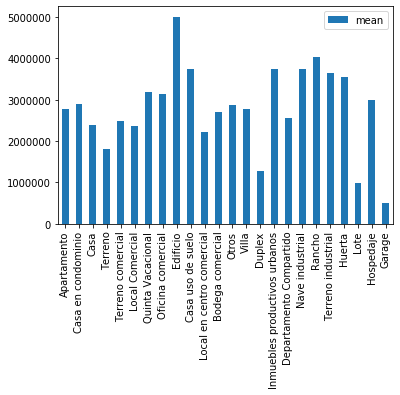

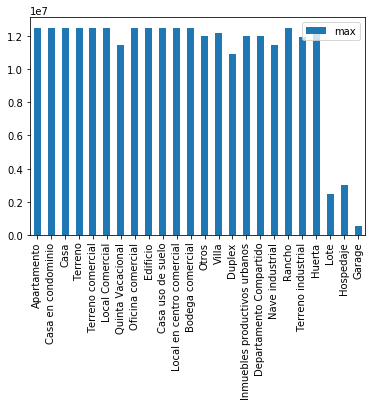

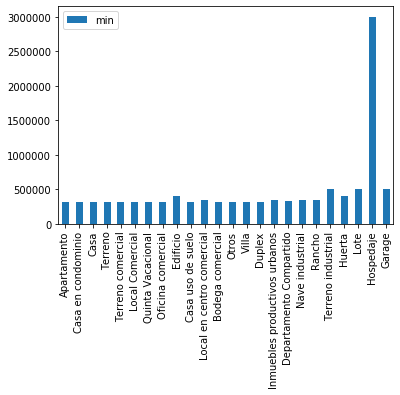

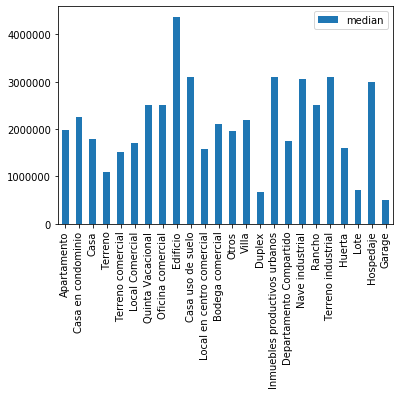

In [6]:
d = {}
for tipo in df["tipodepropiedad"].dropna().unique():
    dfa = df.loc[lambda row:row["tipodepropiedad"] == tipo, "precio"]
    d[tipo] = {"mean":round(dfa.mean()),
               "max":round(dfa.max()),
               "min":round(dfa.min()),
               "median":round(dfa.median())}
l = [pd.DataFrame({stat: [d[tipo][stat] for tipo in d]}, index = list(d.keys())).plot.bar() for stat in d["Casa"]]

## Ejercitacion de groupby

In [7]:
grouped = df.groupby(["ciudad","tipodepropiedad"]).agg({"precio": ["mean", "max"]})
print(grouped)

                                        precio           
                                          mean        max
ciudad            tipodepropiedad                        
Abalá             Terreno             315000.0   315000.0
Abasolo           Casa               1651525.0  2500000.0
                  Casa uso de suelo  4590000.0  8500000.0
Abejones          Casa               2500000.0  2500000.0
Acajete           Apartamento        2368686.0  2368686.0
...                                        ...        ...
ácaxochitlán      Terreno comercial  8000000.0  8000000.0
ácámbaro          Casa               1760000.0  2500000.0
                  Local Comercial    8000000.0  8000000.0
áutlán de Navarro Casa               1199000.0  1199000.0
áyotlán           Casa               3800000.0  3800000.0

[3191 rows x 2 columns]


In [8]:
def agrupar_columnas(df):
    level0 = df.columns.get_level_values(0)
    level1 = df.columns.get_level_values(1)
    return level0 + '_' + level1
grouped.columns = agrupar_columnas(grouped)
grouped

precio_mean  precio_max
ciudad            tipodepropiedad                           
Abalá             Terreno               315000.0    315000.0
Abasolo           Casa                 1651525.0   2500000.0
                  Casa uso de suelo    4590000.0   8500000.0
Abejones          Casa                 2500000.0   2500000.0
Acajete           Apartamento          2368686.0   2368686.0
...                                          ...         ...
ácaxochitlán      Terreno comercial    8000000.0   8000000.0
ácámbaro          Casa                 1760000.0   2500000.0
                  Local Comercial      8000000.0   8000000.0
áutlán de Navarro Casa                 1199000.0   1199000.0
áyotlán           Casa                 3800000.0   3800000.0

[3191 rows x 2 columns]

In [9]:
grouped.reset_index(inplace = True)
grouped

,ciudad,tipodepropiedad,precio_mean,precio_max
0,Abalá,Terreno,315000.0,315000.0
1,Abasolo,Casa,1651525.0,2500000.0
2,Abasolo,Casa uso de suelo,4590000.0,8500000.0
3,Abejones,Casa,2500000.0,2500000.0
4,Acajete,Apartamento,2368686.0,2368686.0
...,...,...,...,...
3186,ácaxochitlán,Terreno comercial,8000000.0,8000000.0
3187,ácámbaro,Casa,1760000.0,2500000.0
3188,ácámbaro,Local Comercial,8000000.0,8000000.0
3189,áutlán de Navarro,Casa,1199000.0,1199000.0


### Cantidad de propiedades por ciudad

Utilizo filter para eliminar las ciudades con cantidad de propiedades insignificante (<100)

#### Se puede observar que solo hay una ciudad con al menos 100 bogedas comerciales.

# Ciudades mas caras/baratas (hacer luego para los demas parametros)

In [10]:
cantidades = df.groupby(["ciudad", "tipodepropiedad"])#.agg({"precio":["mean", "max"], "tipodepropiedad": "count"})
def min_threshold(df, threshold):
    return df["id"].count() > threshold
cantidades_filtradas = cantidades.filter(min_threshold, threshold = 100)
datos_filtrados = cantidades_filtradas.groupby(["ciudad", "tipodepropiedad"]).agg({"precio":["mean", "max"], "tipodepropiedad": "count"})
datos_filtrados.columns = agrupar_columnas(datos_filtrados)
datos_filtrados.reset_index(inplace=True)
datos_filtrados["tipodepropiedad"].value_counts()

Casa                  133
Apartamento            43
Casa en condominio     43
Terreno                22
Local Comercial         6
Oficina comercial       5
Edificio                2
Terreno comercial       2
Bodega comercial        1
Name: tipodepropiedad, dtype: int64

In [11]:
datos_filtrados

,ciudad,tipodepropiedad,precio_mean,precio_max,tipodepropiedad_count
0,Acapulco de Juárez,Apartamento,2.976989e+06,12500000.0,1498
1,Acapulco de Juárez,Casa,2.018941e+06,12000000.0,499
2,Acapulco de Juárez,Casa en condominio,1.662111e+06,7000000.0,283
3,Aguascalientes,Casa,1.477098e+06,12312122.0,1131
4,Aguascalientes,Casa en condominio,1.916089e+06,7500000.0,145
...,...,...,...,...,...
252,Zapopan,Casa,2.804997e+06,12500000.0,7000
253,Zapopan,Casa en condominio,3.094673e+06,12500000.0,1146
254,Zapopan,Local Comercial,2.177816e+06,8000000.0,127
255,Zapopan,Terreno,2.209834e+06,12500000.0,612


In [12]:
casas = datos_filtrados.loc[lambda x:x["tipodepropiedad"] == "Casa",].sort_values("precio_mean")

## Analisis random de ciudad random

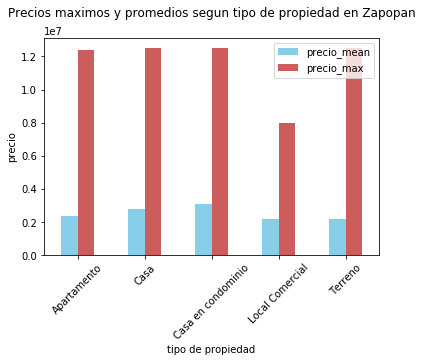

In [13]:
f = datos_filtrados.loc[lambda row:row['ciudad'] == 'Zapopan', ['precio_mean', 'precio_max', 'tipodepropiedad']].set_index('tipodepropiedad')
ax = f.plot.bar(color = ["SkyBlue","IndianRed"], title = 'Precios maximos y promedios segun tipo de propiedad en Zapopan\n')
ax.set_xlabel("tipo de propiedad")
ax.set_ylabel("precio")
plt.xticks(rotation=45)
plt.show()

# Analisis de precios por ciudad-tipodeciudad

In [14]:
df["tipodepropiedad"].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [15]:
df["ciudad"].value_counts()
df["banos"].value_counts()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

# Graficos a la N

Text(0.5, 0, 'Antiguedad (años)')

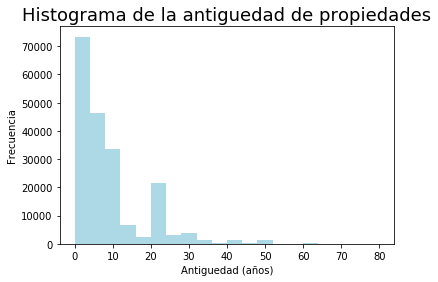

In [16]:
ax = df["antiguedad"].dropna().plot.hist(bins=20, color="lightblue")
ax.set_title("Histograma de la antiguedad de propiedades", fontsize = 18)
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Antiguedad (años)")

Text(0.5, 0, 'Antiguedad (años)')

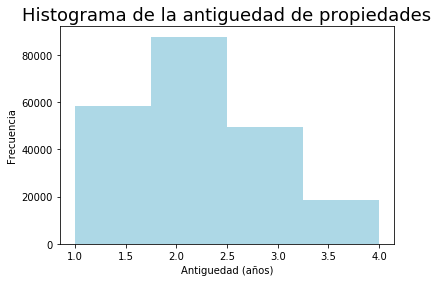

In [17]:
ax = df["banos"].dropna().plot.hist(bins=4, color="lightblue")
ax.set_title("Histograma de la antiguedad de propiedades", fontsize = 18)
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Antiguedad (años)")

In [18]:
df['antiguedad'].dropna().value_counts().head(10)

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
4.0      7944
3.0      5616
2.0      5059
15.0     3965
6.0      3169
Name: antiguedad, dtype: int64

In [19]:
df['ciudad'].value_counts()

Querétaro              12646
Benito Juárez          11014
Zapopan                10360
San Luis Potosí         7925
Mérida                  7162
                       ...  
Juárez Hidalgo             1
Gustavo Díaz Ordaz         1
Ocotlán de Morelos         1
Zimatlán de Alvarez        1
Villa de Allende           1
Name: ciudad, Length: 875, dtype: int64

In [20]:
cantidades = df.groupby(["ciudad", "habitaciones"])
cantidades.ngroups

2626